In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path

In [2]:
def fig_input(dataroot):
    
    # loading
    image = cv2.imread(dataroot)
    assert image is not None, "file could not be read, check the path"     
 
    # convertion to RGB
    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # image's name and format
    name = (str(dataroot)).split('/')[-1]
    fig_name, file_format = name.split('.')
    print(name)
    
    #print
    plt.imshow(image_RGB)
    plt.show()

    return image_RGB, fig_name, file_format

In [3]:
def fig_save(image):
        
    n = 1
    while True:  
        name = fig_name+str(n)+'.'+file_format
        if os.path.isfile(name) == True:
            n += 1
        else:
            try:
                cv2.imwrite(name, image)
                print('object saved:', os.getcwd()+'\\'+name)
                break
            except Exception:
                print('sorry, object not saved')
                break

In [4]:
def contrast_brightness(image):
    
    gamma = 0.5
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype('uint8')
    img_corrected = cv2.LUT(image, table)
    
    plt.imshow(img_corrected)
    plt.show()
    
    todo = input('Do you want to save the image (y/n)? ')
    if todo == 'y':
        fig_save(img_corrected)
    
    return img_corrected    

In [5]:
def brightness(image):

    image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
   
    h, s, v = cv2.split(image_HSV)
    v_corrected = cv2.equalizeHist(v)
    
    image_HSV_corrected = cv2.merge((h, s, v_corrected))
    image_RGB_corrected = cv2.cvtColor(image_HSV_corrected, cv2.COLOR_HSV2RGB)
    
    plt.imshow(image_RGB_corrected)
    plt.show()
    
    todo = input('Do you want to save the image (y/n)? ')
    if todo == 'y':
        fig_save(image_RGB_corrected)
    
    return image_RGB_corrected   

In [6]:
def saturation(image):

    image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
   
    h, s, v = cv2.split(image_HSV)
    s_corrected = cv2.equalizeHist(s)
    
    image_HSV_corrected = cv2.merge((h, s_corrected, v))
    image_RGB_corrected = cv2.cvtColor(image_HSV_corrected, cv2.COLOR_HSV2RGB)
    
    plt.imshow(image_RGB_corrected)
    plt.show()
    
    todo = input('Do you want to save the image (y/n)? ')
    if todo == 'y':
        fig_save(image_RGB_corrected)
    
    return image_RGB_corrected    

In [7]:
def fig_resize(img):

    x_size = int(input('Input the multiplicity of size change (0.5, 1.5, 2, etc.) for scale X: '))
    y_size = int(input('Input the multiplicity of size change (0.5, 1.5, 2, etc.) for scale Y: '))
    
    interpolation = input('\nSelect interpolation method:\n a - INTER_AREA for shrinking\n' 
                          ' c - INTER_CUBIC (slow)\n l - INTER_LINEAR for zooming\n') 
    if interpolation == 'a':
        interpolation = cv2.INTER_AREA
    elif interpolation == 'c':
        interpolation = cv2.INTER_CUBIC
    elif interpolation == 'l': 
        interpolation = cv2.INTER_LINEAR
    else:
        interpolation = cv2.INTER_LINEAR
        print('INTER_LINEAR by default')     
    
    res = cv2.resize(img, None, fx=x_size, fy=y_size, interpolation=interpolation)
    
    plt.imshow(res)
    plt.show() 

    todo = input('Do you want to save the image (y/n): ')
    if todo == 'y':
        fig_save(res)
    
    return res

In [8]:
def cut(img): #, y0, y1, x0, x1):
    
    x0 = int(input('input lower border (50, 236, etc.) for scale X: '))
    x1 = int(input('input upper border (100,450, etc.) for scale X: '))
    y0 = int(input('input lower border (50, 236, etc.) for scale Y: '))
    y1 = int(input('input upper border (100,450, etc.) for scale Y: '))
    
    res = img[y0:y1, x0:x1]
    
    plt.imshow(res)
    plt.show() 
    
    todo = input('Do you want to save the image (y/n): ')
    if todo == 'y':
        fig_save(res)
        
    return res

In [9]:
def fig_rotation(img, angle):

    rows, cols, _ = img.shape
    
    # cols-1 and rows-1 are the coordinate limits.
    M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),angle,1)
    res = cv2.warpAffine(img, M, (cols, rows))
    
    plt.imshow(res)
    plt.show() 
    
    todo = input('Do you want to save the image (y/n): ')
    if todo == 'y':
        fig_save(res)
        
    return res


cat.jpg


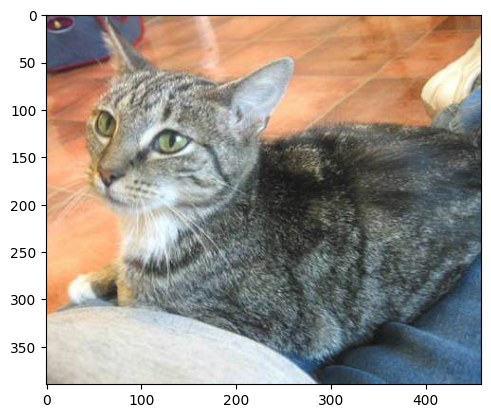

In [10]:
# image input
dataroot = 'C:/Users/MyWork/PycharmProjects/HW56_Color_Models/cat.jpg'
img, fig_name, file_format = fig_input(dataroot)

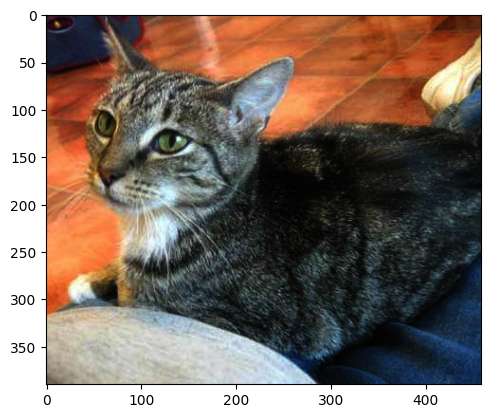

Do you want to save the image (y/n)? y
object saved: C:\Users\MyWork\PycharmProjects\HW57_Pixels\cat1.jpg


In [11]:
# contrast & brightness correction (gamma correction)
img_corrected_contrast_brightness = contrast_brightness(img)

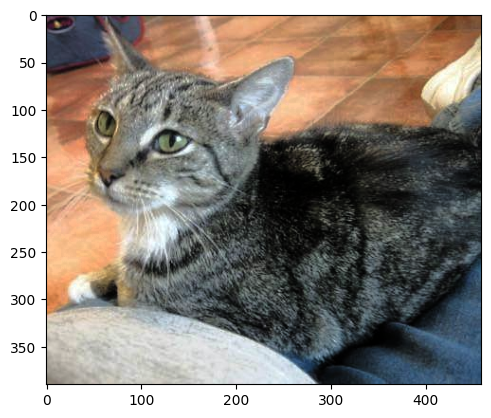

Do you want to save the image (y/n)? y
object saved: C:\Users\MyWork\PycharmProjects\HW57_Pixels\cat2.jpg


In [12]:
# brightness correction
img_corrected_brightness = brightness(img)

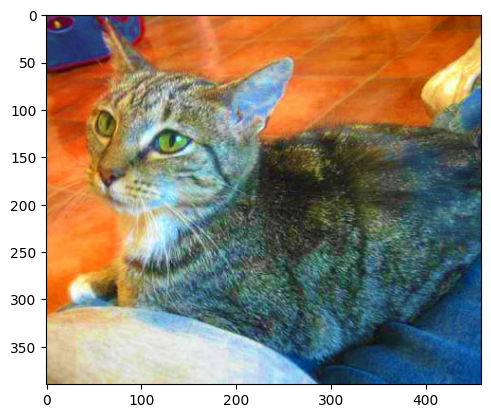

Do you want to save the image (y/n)? y
object saved: C:\Users\MyWork\PycharmProjects\HW57_Pixels\cat3.jpg


In [13]:
# saturation correction
img_corrected_saturation = saturation(img)

Input the multiplicity of size change (0.5, 1.5, 2, etc.) for scale X: 2
Input the multiplicity of size change (0.5, 1.5, 2, etc.) for scale Y: 4

Select interpolation method:
 a - INTER_AREA for shrinking
 c - INTER_CUBIC (slow)
 l - INTER_LINEAR for zooming
c


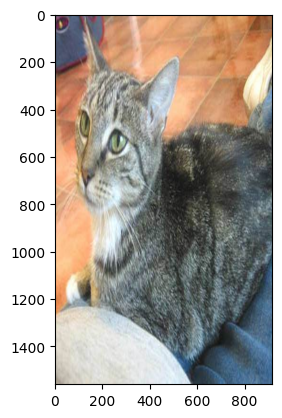

Do you want to save the image (y/n): n


In [14]:
# image resizing
img_resized = fig_resize(img)

input lower border (50, 236, etc.) for scale X: 0
input upper border (100,450, etc.) for scale X: 250
input lower border (50, 236, etc.) for scale Y: 0
input upper border (100,450, etc.) for scale Y: 300


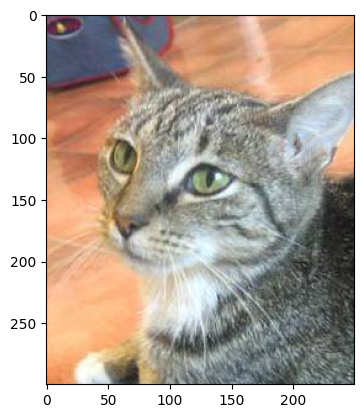

Do you want to save the image (y/n): y
object saved: C:\Users\MyWork\PycharmProjects\HW57_Pixels\cat4.jpg


In [15]:
# image cropping
img_cut = cut(img)       

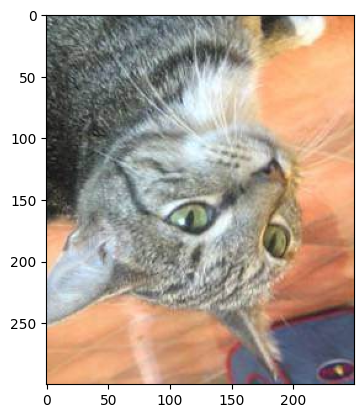

Do you want to save the image (y/n): n


In [16]:
# image rotation
img_rotated = fig_rotation(img_cut, 180)